##  Pitches, scales, elements, frequencies, etc. IN RTcmix ! 
### (1) Pitches, Scales and Modes -- Dictionaries and lists
### (2) Generating RTcmix scores from lists of pitches

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import Popen
import subprocess as sp
import os

import sys
sys.path.append('./modules/')

import IPython.display as ipd

# _ac stands for autocheck
cmixStatus, cmixResult = sp.getstatusoutput("CMIX")
if cmixStatus == 0:
    cmixInstalled = True
    print("CMIX found.")
else:
    cmixInstalled = False
    print("CMIX not found, using pyGoRTcmix instead.")

#for testing:
cmixInstalled = False

CMIX found.


# ==============================================
# (1) modes, review

### Equal temperament (modern western instruments): 

In classical western music, the octave is divided into 12 equal-sized "semi-tone" intervals: <br>
$f = f_0*2^{(k/N)+v}$ <br>
$v$ is an integer that marks how many octaves you want to be relative to $f_0$ <br>
$k$ are integers that representing intervals of the N that make the octave (on the piano N=12). <br>




In [19]:
# make an array of integers: 
k = np.arange(0,12,1) # this makes a numpy array. 
print(k)
k = np.arange(12)
print(k)
k = np.arange(12+1)
print(k)

# ==============================
v = 0
root = 220 # A3
print('all semi-tones:')
f = root*2**(v+k/12)
print(f)

print('major scale:')
# intervals 2,2,1,2,2,2,1 
major = np.array([0,2,4,5,7,9,11,12])
print(major)
f = root*2**(v+major/12)
print(f)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
all semi-tones:
[220.         233.08188076 246.94165063 261.6255653  277.18263098
 293.66476792 311.12698372 329.62755691 349.22823143 369.99442271
 391.99543598 415.30469758 440.        ]
major scale:
[ 0  2  4  5  7  9 11 12]
[220.         246.94165063 277.18263098 293.66476792 329.62755691
 369.99442271 415.30469758 440.        ]


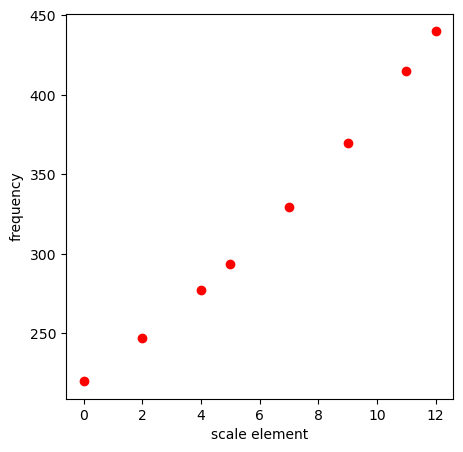

In [20]:
fig = plt.figure(figsize=(5,5))
plt.plot(major,f, 'ro')
plt.xlabel('scale element')
plt.ylabel('frequency')
plt.show()

### OR, represented another way: 

In [21]:
import matplotlib.patches as patches

def makePitchRing(indexes):
    circle = np.linspace(0,2*np.pi,64)
    r = 1.0
    x = r*np.sin(circle)
    y = r*np.cos(circle)

    # the note locations. 
    base_dots = np.linspace(0,2*np.pi,13)
    xd = r*np.sin(base_dots)
    yd = r*np.cos(base_dots)

    # the text locations
    r = 1.15
    xt = r*np.sin(base_dots)
    yt = r*np.cos(base_dots)

    # ========================
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111, aspect='equal')

    # (0) plot a filled square with a filled circle in it...
    # patches.Rectangle((x,y,lower left corner),width,height)
    #ax1.add_patch(patches.Rectangle((0.1, 0.1),0.5,0.5,facecolor="red"))

    ax1.add_patch(patches.Rectangle((-1.25, -1.25),2.5,2.5,facecolor=[0.6, 0.6, 0.6]))
    ax1.plot(x,y,'k-')
    ax1.plot(xd,yd,'w.')

    radius_norm = 0.08  # radius normalized, scaled to size of box

    for ind,interval in enumerate(indexes):
        # print(ind,interval)
        ax1.add_patch(patches.Circle((xd[interval], yd[interval]),radius_norm,facecolor="red")) 
        ax1.text(xt[interval], yt[interval],pitch_classes[interval])
        
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    plt.show()


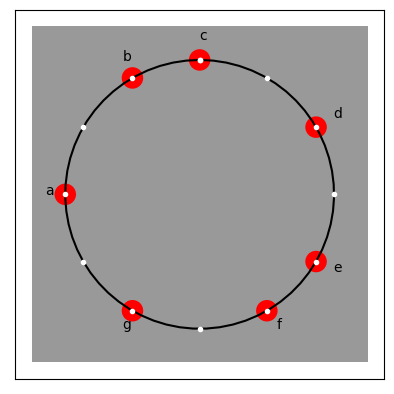

In [22]:
pitch_classes = ['c','c#','d','d#','e','f','f#','g','g#','a','a#','b']
#indexes = [0,2,4,5,7,9,11]
#makePitchRing(indexes)
makePitchRing(major[0:-1])

In [23]:
# Now lets make a sort of data base for pitches... 
# to connect names to pitches, 
# and 

C3 = 440.0 * 2**(3/12-1)
print(C3)

def notenum2freq(k,v,f0):
    freqs = f0*2**(v+k/12)
    return freqs

ints = np.arange(12)
print(ints)
ref_scale_freqs = notenum2freq(ints,0,C3)
print(ref_scale_freqs)

261.6255653005986
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[261.6255653  277.18263098 293.66476792 311.12698372 329.62755691
 349.22823143 369.99442271 391.99543598 415.30469758 440.
 466.16376152 493.88330126]


In [24]:
# using dictionaries: 
# https://learnpythonthehardway.org/book/ex39.html
# https://jeffknupp.com/blog/2015/08/30/python-dictionaries/

# a list of dictionaries: 
# http://stackoverflow.com/questions/19577258/python-analog-to-matlab-data-structure
# database.append({'E': 17e4, 'var2': 'C:\\data file path', 'var3': [1, 2, 3, 4]})
pitch_classes = ['c','c#','d','d#','e','f','f#','g','g#','a','a#','b']

# does it make any sense to make a dictionary here?
#pitches_midC_ref = {'pitches':pitch_classes, 'freqs':ref_scale_freqs }
#pitch_names = pitches_midC_ref['pitches']
#freqs = pitches_midC_ref['freqs']


In [25]:
for pair in zip(pitch_classes,ref_scale_freqs):
    print(pair)

for ind,pitchname in enumerate(pitch_classes):
    print(pitchname + ' : ' + str(ref_scale_freqs[ind]))
    

('c', 261.6255653005986)
('c#', 277.1826309768721)
('d', 293.6647679174076)
('d#', 311.12698372208087)
('e', 329.6275569128699)
('f', 349.2282314330039)
('f#', 369.9944227116344)
('g', 391.99543598174927)
('g#', 415.30469757994507)
('a', 439.99999999999994)
('a#', 466.16376151808987)
('b', 493.88330125612407)
c : 261.6255653005986
c# : 277.1826309768721
d : 293.6647679174076
d# : 311.12698372208087
e : 329.6275569128699
f : 349.2282314330039
f# : 369.9944227116344
g : 391.99543598174927
g# : 415.30469757994507
a : 439.99999999999994
a# : 466.16376151808987
b : 493.88330125612407


In [26]:
# or make a dictionary ! 
pitch_freq_ref = dict(zip(pitch_classes,ref_scale_freqs))

pitch_freq_ref
print(pitch_freq_ref)


{'c': 261.6255653005986, 'c#': 277.1826309768721, 'd': 293.6647679174076, 'd#': 311.12698372208087, 'e': 329.6275569128699, 'f': 349.2282314330039, 'f#': 369.9944227116344, 'g': 391.99543598174927, 'g#': 415.30469757994507, 'a': 439.99999999999994, 'a#': 466.16376151808987, 'b': 493.88330125612407}


In [27]:
print('============== CALL ONE PITCH NAME ============')
C3 = pitch_freq_ref['c']
print('C3 = '+ str(C3))

============== CALL ONE PITCH NAME ============
C3 = 261.6255653005986


# =============================================
# (4) Modes -- Dictionaries and lists

In [28]:
# NOW LETS MAKE DICTIONARIES FOR THE MODES !! 

modes = {
    'ionian':[2,2,1,2,2,2,1],
    'dorian':[2,1,2,2,2,1,2],
    'phrygian':[1,2,2,2,1,2,2],
    'lydian':[2,2,2,1,2,2,1],
    'mixolydian':[2,2,1,2,2,1,2],
    'aeolian':[2,1,2,2,1,2,2],
    'lochrian':[1,2,2,1,2,2,2]
}

print(len(modes))

7


In [29]:
# calculate the elements of the scale from the intervals (a cumulative sum): 

intervals = modes['ionian']
print(intervals)

x = np.cumsum(intervals)
print(x)
indexes2 = [0]
for val in x[:-1]:
    indexes2.append(val)

indexes2 = np.array(indexes2)
print(type(indexes2))

[2, 2, 1, 2, 2, 2, 1]
[ 2  4  5  7  9 11 12]
<class 'numpy.ndarray'>


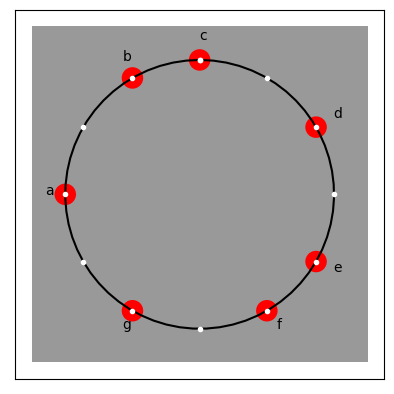

In [30]:
makePitchRing(indexes2)

# ==========================================================
# (6) generating RTcmix scores from simple lists of pitches
### same as above but with RTcmix

In [31]:
# FUNCTION FOR GENERATING THE RTcmix score ! 

def makeSimpleScore(base_name,time,freqs):
    # ====================
    score_name = base_name + '.sco'
    print(score_name)
    f_out = open("./" + score_name , 'w')
    # YOU MUST DELETE THE SOUND FILE BEFORE RUNNING (either with python or with -clobber )
    f_out.write("set_option(\"clobber = on\")\n")

    f_out.write("rtsetparams(44100, 2)\n")
    f_out.write("load(\"WAVETABLE\")\n")

    # output_string = 'rtoutput(\"' + base_name + '.wav\")\n'  
    # don't need the brackets to make it an array ! 
    # f_out.write(output_string)

    #----------------------CHECK IF CMIX COMMAND IS INSTALLED-----------------------
    #only use rtoutput if CMIX command is found.
    cmixStatus, cmixResult = sp.getstatusoutput("CMIX")
    #the cmixInstalled variable can also be passed from the notebook
    #in that is case, the output of sp.getstatusoutput("CMIX") is overridden

    if cmixInstalled:
        cmixStatus = 0
    else:
        cmixStatus = 127

    if cmixStatus == 0:
        output_string = 'rtoutput(\"' + base_name + '.wav\")\n'
        # don't need the brackets to make it an array !
        print("CMIX found.")
        print(output_string)
        f_out.write(output_string)
    else:
        print("CMIX not found; rtoutput() will not be used in score.")
    #------------------------------------------------------------------------------
    
    f_out.write("waveform = maketable(\"wave\", 1000, 1.0)\n")
    # to add overtones, just add amplitude weights
    #f_out.write("waveform = maketable(\"wave\", 1000, 1.0, 0.4, 0.2)\n")

    f_out.write("ampenv = maketable(\"window\", 1000, \"hamming\")\n")    

    # write out the score ! 
    # (start time, duration, amplitude, frequency, channel mix [0 left, 1.0 right],
    # table_handle (which waveform to use)

    # for now, constants: 
            
    # reset(44100) makes it very very smooth... 
            
    amp = 10000 
    mix = 0.5 # 0 = left, 1 = right, but here just 1 channel
    tab_han = 'waveform'

    for i,freq_val in enumerate(freqs):
        t_start = time[i]
        # dur = durations[i]-- here, constant, defined above
        dur = 1.4
        freq = freq_val
        note_string = 'WAVETABLE(' + str(t_start) + ', ' \
                  + str(dur)  + ', ' + str(amp)+ '*ampenv' + ', ' \
                  + str(freq)  + ', ' + str(mix)  + ', ' \
                  +  tab_han + ')\n' 
        f_out.write(note_string)
        
    f_out.close()
    return score_name



In [32]:
# EXERCISE:  MAKE AN RTCMIX SCORE FROM THIS... 
base_name = 'ionian_c3'
# pluck freqs out of the scale... or calculate freqs with k ? 
freqs = notenum2freq(indexes2,0,C3)
print(freqs)
time_sco = np.linspace(0,10,len(indexes2))

makeSimpleScore(base_name,time_sco,freqs)

[261.6255653  293.66476792 329.62755691 349.22823143 391.99543598
 440.         493.88330126]
ionian_c3.sco
CMIX not found; rtoutput() will not be used in score.


'ionian_c3.sco'

In [33]:
# READ THE SCORE ! 

scoread = open(base_name+'.sco')
data = scoread.read()
print(data)


set_option("clobber = on")
rtsetparams(44100, 2)
load("WAVETABLE")
waveform = maketable("wave", 1000, 1.0)
ampenv = maketable("window", 1000, "hamming")
WAVETABLE(0.0, 1.4, 10000*ampenv, 261.6255653005986, 0.5, waveform)
WAVETABLE(1.6666666666666667, 1.4, 10000*ampenv, 293.6647679174076, 0.5, waveform)
WAVETABLE(3.3333333333333335, 1.4, 10000*ampenv, 329.6275569128699, 0.5, waveform)
WAVETABLE(5.0, 1.4, 10000*ampenv, 349.2282314330039, 0.5, waveform)
WAVETABLE(6.666666666666667, 1.4, 10000*ampenv, 391.99543598174927, 0.5, waveform)
WAVETABLE(8.333333333333334, 1.4, 10000*ampenv, 439.99999999999994, 0.5, waveform)
WAVETABLE(10.0, 1.4, 10000*ampenv, 493.88330125612407, 0.5, waveform)



In [36]:
# play RTcmix score and create a wave file
# use CMIX if installed; if not, use pyGoRTcmix
abitextra = 0.5
dur_sound = time_sco[-1] + abitextra 

if cmixInstalled:
    cmix_cmd = 'CMIX < ' + base_name + '.sco'
    print(cmix_cmd)
else:
    dur = str(dur_sound)
    #cmix_cmd = os.path.abspath('../pyGoRTcmix/pyGoRTcmix') + ' -inputscore ' + os.path.abspath(base_name + '.sco') + ' -output ' + os.path.abspath(base_name + '.wav') + ' -dur ' + dur
    cmix_cmd = os.path.abspath('../../pyGoRTcmix/Contents/MacOS/pyGoRTcmix') + ' -inputscore ' + os.path.abspath(base_name + '.sco') + ' -output ' + os.path.abspath(base_name + '_pyGo.wav') + ' -dur ' + dur
   
    print(cmix_cmd)

runCMIX = sp.Popen(cmix_cmd, shell=True) # if can only be called from a shell, use shell=True

runCMIX.wait()
print('\nhopefully i just wrote your sound file (' + base_name + '.wav); is it here?')

if sys.platform == 'win32':
    ! dir *.wav
else:
    ! ls *.wav

/Users/ben/githole/pyGoRTcmix/pyGoRTcmix -inputscore /Users/ben/githole/datamovies_y21/notebooks/ionian_c3.sco -output /Users/ben/githole/datamovies_y21/notebooks/ionian_c3_pyGo.wav -dur 10.5



RtApiCore::startStream(): the stream is already running!



[notice ] --------> RTcmix-mm 4.2.1 <--------


hopefully i just wrote your sound file (ionian_c3.wav); is it here?
ionian_c3.wav      ionian_c3_pyGo.wav


In [66]:
# to automatically move the sound and score files to a different directory: 
# move_cmd = 'mv ' + base_name + '.* ../3_output_nogit/'
# sp.Popen(move_cmd, shell=True)

## MICROPROJECT:  
(1) Make the note sequence random  <br> 
(2) Make the note sequence microtonal  <br> 
(3) Make a rhythm by moving start times  <br> 

In [58]:
# EXERCISE:  CHANGE THE ROOT NOTE OF THE SCALE ! 


In [ ]:
# EXERCISE: STRING TOGETHER A SERIES OF SCALES, LOOPING OVER ONE THING TO CHANGE, 
# such as root note or mode... and make a longer RTcmix score... 

### (7) Circles of 5ths and 4ths... 
### (8) More considerations for composing from data.. chords... key changes, microtonal scales... 